In [2]:
#importing required Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset as CSV

data=pd.read_csv("C:\\Users\\Sai Kiran Mahalingam\\OneDrive\\Desktop\\Besant Data Science\\Data Science\\Zomato-data-.csv")
print(data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
#Converting Rate string to Float

def rate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data['rate']=data['rate'].apply(rate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
#Information of the Dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurat')

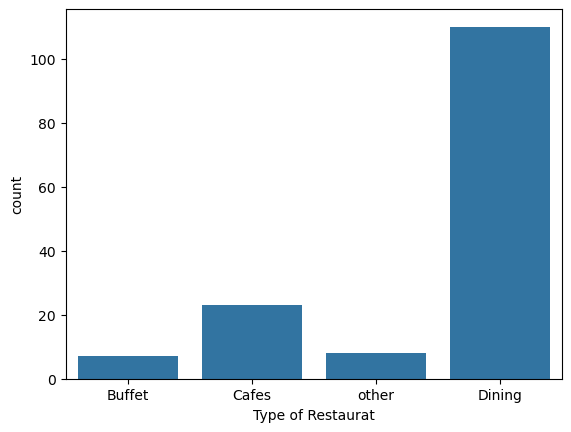

In [6]:
#Exploring Type of Restaurants

sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of Restaurat")

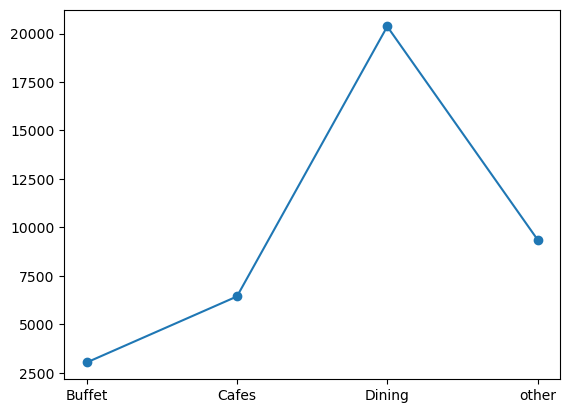

In [7]:
#Finding the preferred type of restaurant 

grp_data=data.groupby('listed_in(type)')['votes'].sum()
res=pd.DataFrame({'votes':grp_data})
plt.plot(res,marker="o")

In [8]:
#Determining maximum number of Votes 

max=data['votes'].max()
max_votes=data.loc[data['votes']==max,'name']

print("Restaurant with Max Votes:",max_votes)

Restaurant with Max Votes: 38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

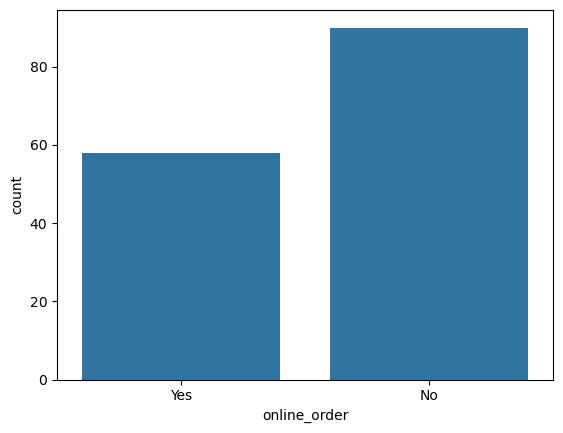

In [9]:
#Exploring Online orders column

sns.countplot(x=data['online_order'])

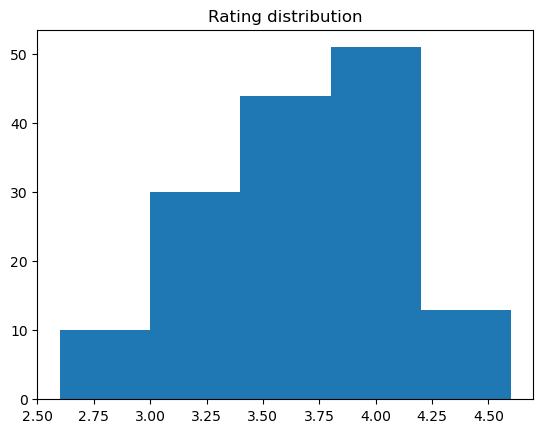

In [10]:
#Exploring Rate Column

plt.hist(data['rate'],bins=5)
plt.title('Rating distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

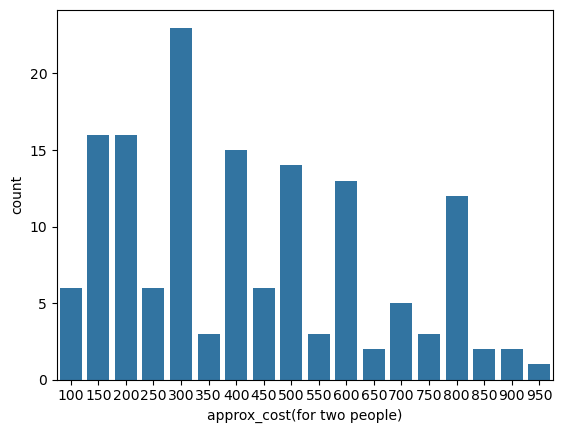

In [11]:
#Exploring Approx cost for two people column

couple=data['approx_cost(for two people)']
sns.countplot(x=couple)

<Axes: xlabel='online_order', ylabel='rate'>

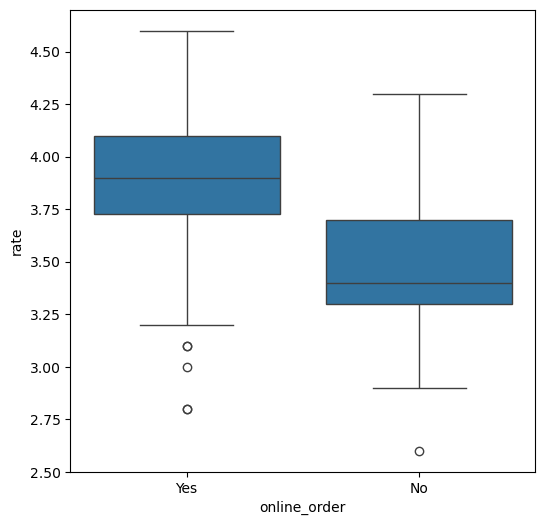

In [12]:
#Examining whether online order receive higher rating than offline

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

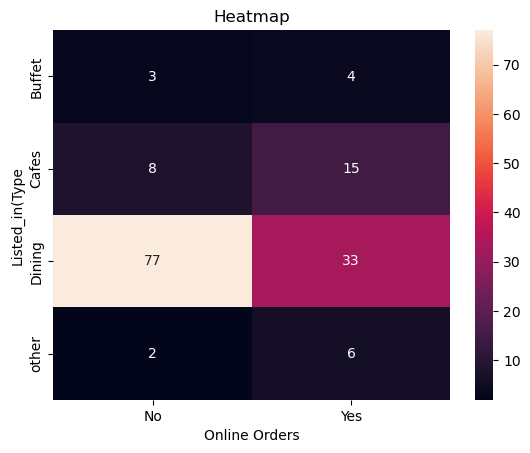

In [15]:
pivot=data.pivot_table(index='listed_in(type)',columns=('online_order'), aggfunc=('size'),fill_value=0)
sns.heatmap(pivot,annot=True)
plt.title('Heatmap')
plt.xlabel('Online Orders')
plt.ylabel('Listed_in(Type')
plt.show()